# **Prediction of Product Sales**




### *Author: Matt S.*

## Project Overview

## Load and Inspect Data

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Read the data
file_url = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(file_url)

### Preview the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Clean Data

### Check for duplicates

In [ ]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

No duplicates, nothing to drop.

Identify missing values



In [ ]:
cols_with_null = df.isna()
cols_with_null.sum()

# I read this output backwards, I am only MISSING 1463 values. I have roughly 80% or so of data for Weight.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

These two rows have missing values:
```
Item_Weight                  1463
Outlet_Size                  2410
```

### Handle missing values

In [ ]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [ ]:
# Filter for categorical columns
cat_cols = df.select_dtypes('object').columns

In [ ]:
# Set null values in Item_Weight to -1
df[num_cols] = df[num_cols].fillna(-1)

In [ ]:
# Set null values in categorical colums to "Missing"
df[cat_cols] = df[cat_cols].fillna("Missing")

Confirm that there are no missing values after addressing them.



In [ ]:
# Check for null values in all columns
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# Check for unique category values
df[cat_cols].nunique()


# There are:
# 5 types of fat content
# 16 item types etc.

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
# Check for unique numerical values
df[num_cols].nunique()

Item_Weight                   416
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# Use the result to determine if any of the columns have 100% unique values.
df.nunique()/len(df) * 100

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

None of the values have a high unique percentage, so for now we won't change the index.

### Find inconsistent values

In [ ]:
# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930



All of the these columns need to be fixed.

```
Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
```


In [ ]:
# Replace variations of "Low Fat" with "Low Fat"
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

# Replace variations of "Regular" with "Regular"
df['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)


Confirm if the column names are consistent.



In [ ]:
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

```
Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
```

The values are now consistent.

For any numerical columns, obtain the summary statistics of each (min, max, mean).


In [ ]:
df[num_cols].describe().loc[['min', 'max', 'mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


# Functions

Any functions tested before data cleaning would likely error out. All declarations and tests will occur in this section.

In [ ]:
# Histogram
def hist2(df, column_name, bin_count='auto', fs=(8,4), title_label='', x_label='', y_label='', fmt=''):

  # Plot
  fig, ax = plt.subplots()
  ax = sns.histplot(data=df, x=column_name, bins=bin_count)
  # Variables
  feature = df[column_name]
  mean = feature.mean()
  median = feature.median()

  # Titles and labels
  ax.set(xlabel = x_label, ylabel = y_label, title = title_label)


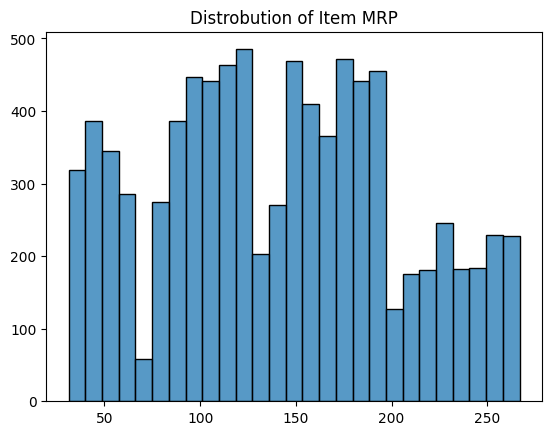

In [ ]:
hist2(df, 'Item_MRP', title_label='Distrobution of Item MRP')

## Exploratory Data Analysis

In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Determine numerical columns
Check which columns are numeric so that categorical columns aren't accidentally used in the histograms.

In [ ]:
# Filter for number columns
num_cols = df.select_dtypes('number').columns

In [ ]:
for col in num_cols:
  print(f"{col}: {df[col].dtype}")
  # print("\n")

Item_Weight: float64
Item_Visibility: float64
Item_MRP: float64
Outlet_Establishment_Year: int64
Item_Outlet_Sales: float64


In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Item Outlet Sales will be skewed on the graph because the mean is higher than the median.

### Identifying correlations

In [ ]:
# Check numerics for correlations
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


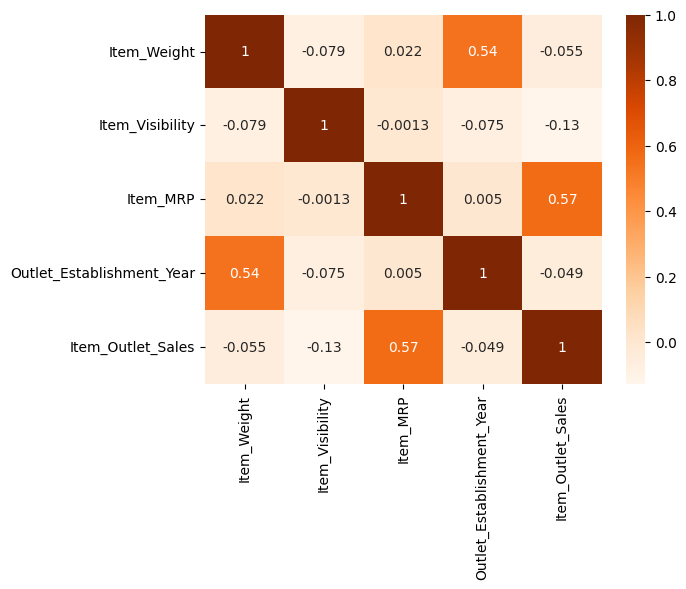

In [ ]:
ax = sns.heatmap(corr, cmap='Oranges', annot=True)

Based on the output above:
  - Item MRP and Item Outlet Sales have a moderate correlation at 0.57
  - Item Visibility has no correlation with Item MRP
  - Outlet Year and Weight have a moderate correlation of 0.54, suggesting that some stores may have catered to items with a specific weight in the past (or currently do).

### Histograms for reviewing distrobution of data

Use a loop to print out histograms of all numerical columns for a "bird's eye" view of data.

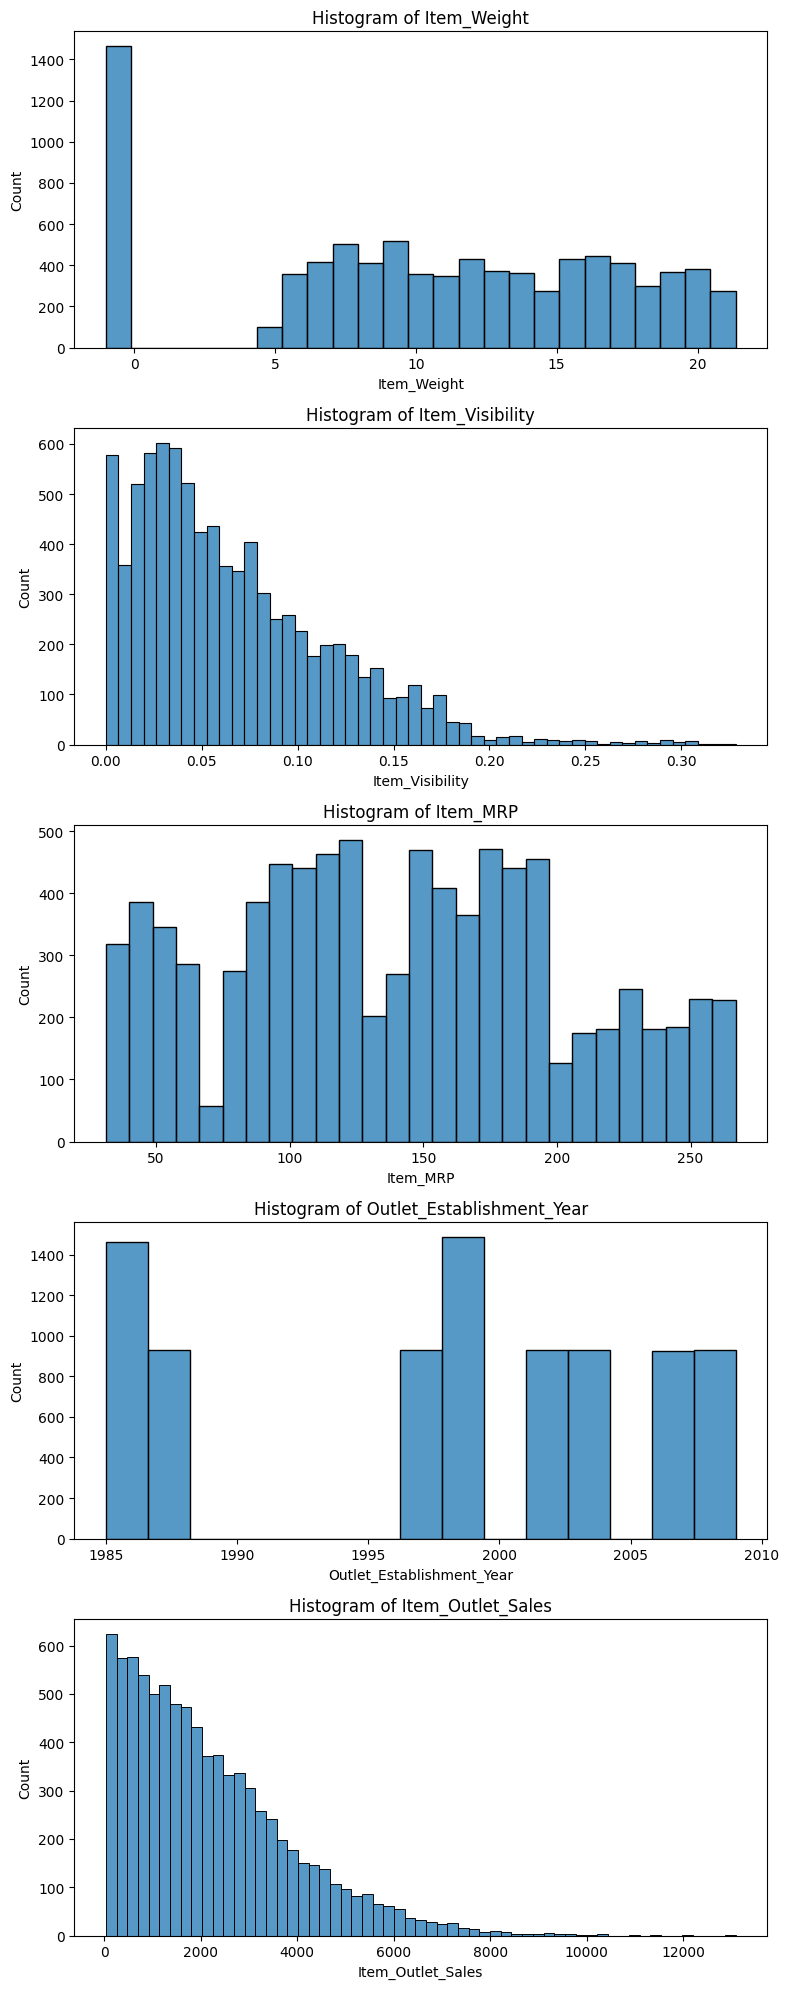

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a histogram of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f'Histogram of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

### Boxplots of reviewing distrobution of data

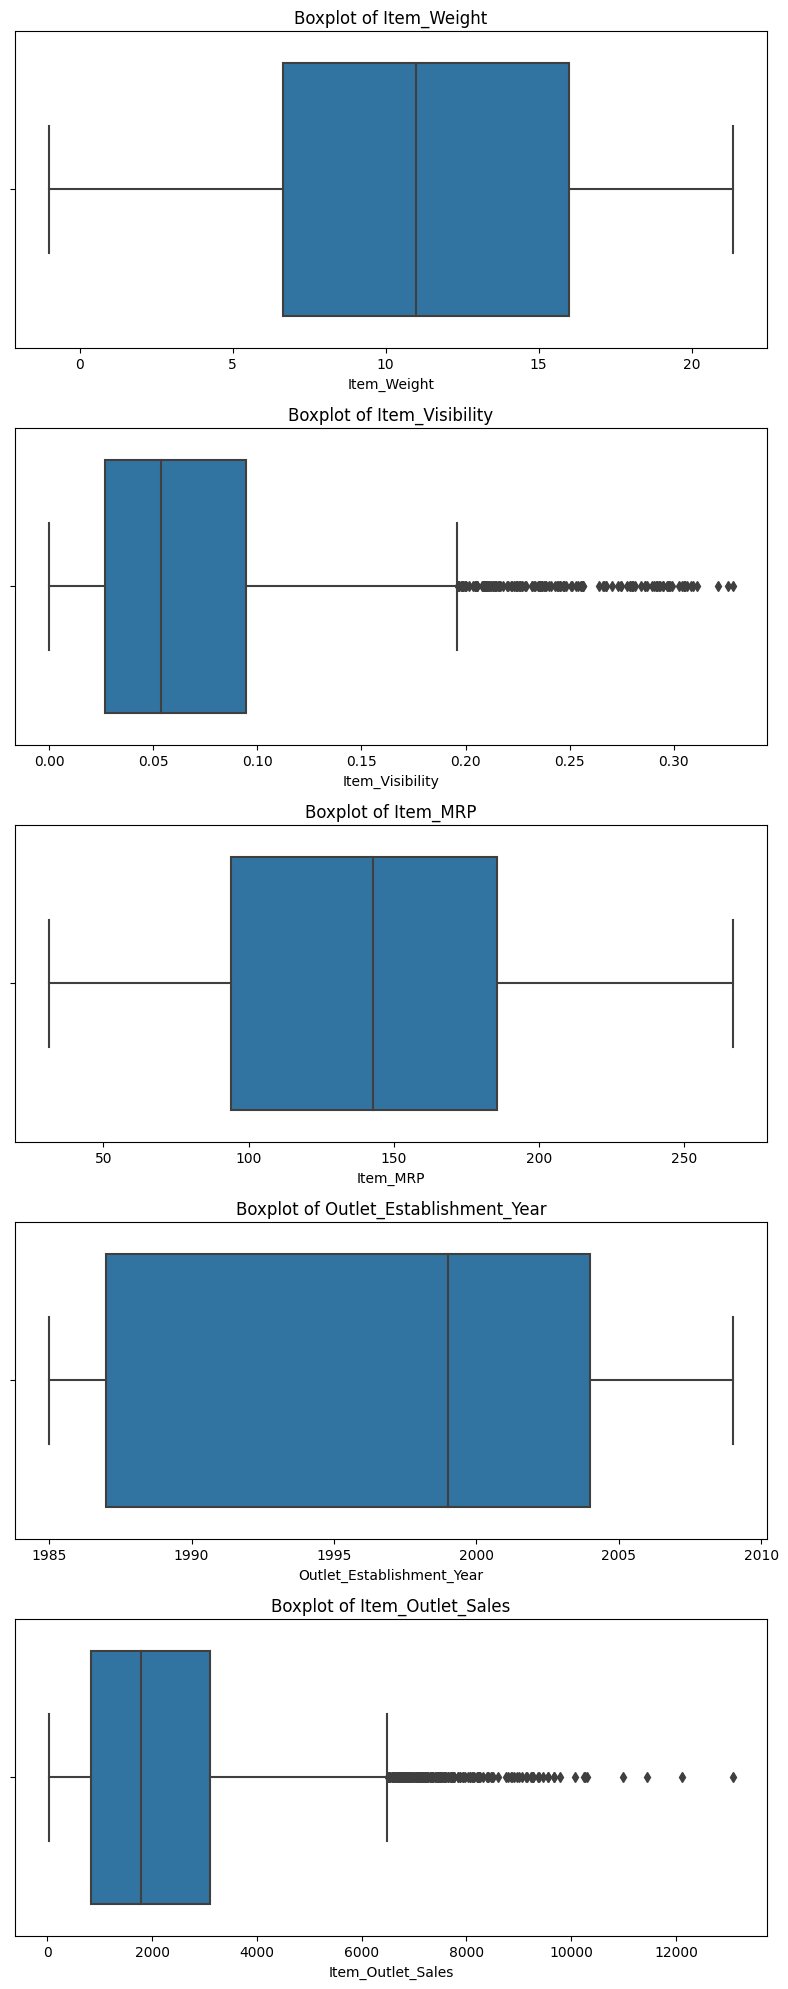

In [ ]:
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 20))

# Generate a boxplot of all numeric columns for easy comparision
for col, ax in zip(num_cols, axes):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

- The boxplots show that both Item_Outlet_Sales and Item_Visibility have many outliers.
- The median of outlet establishment shows that most shops were opened around the 1998 or 1999.

## Explanatory Data Analysis

Can Item_MRP be grouped by outlet type? Do some outlet types have an overall higher average Item_MRP compared to others?

Which outlet type sold the most items?

In [ ]:
means = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

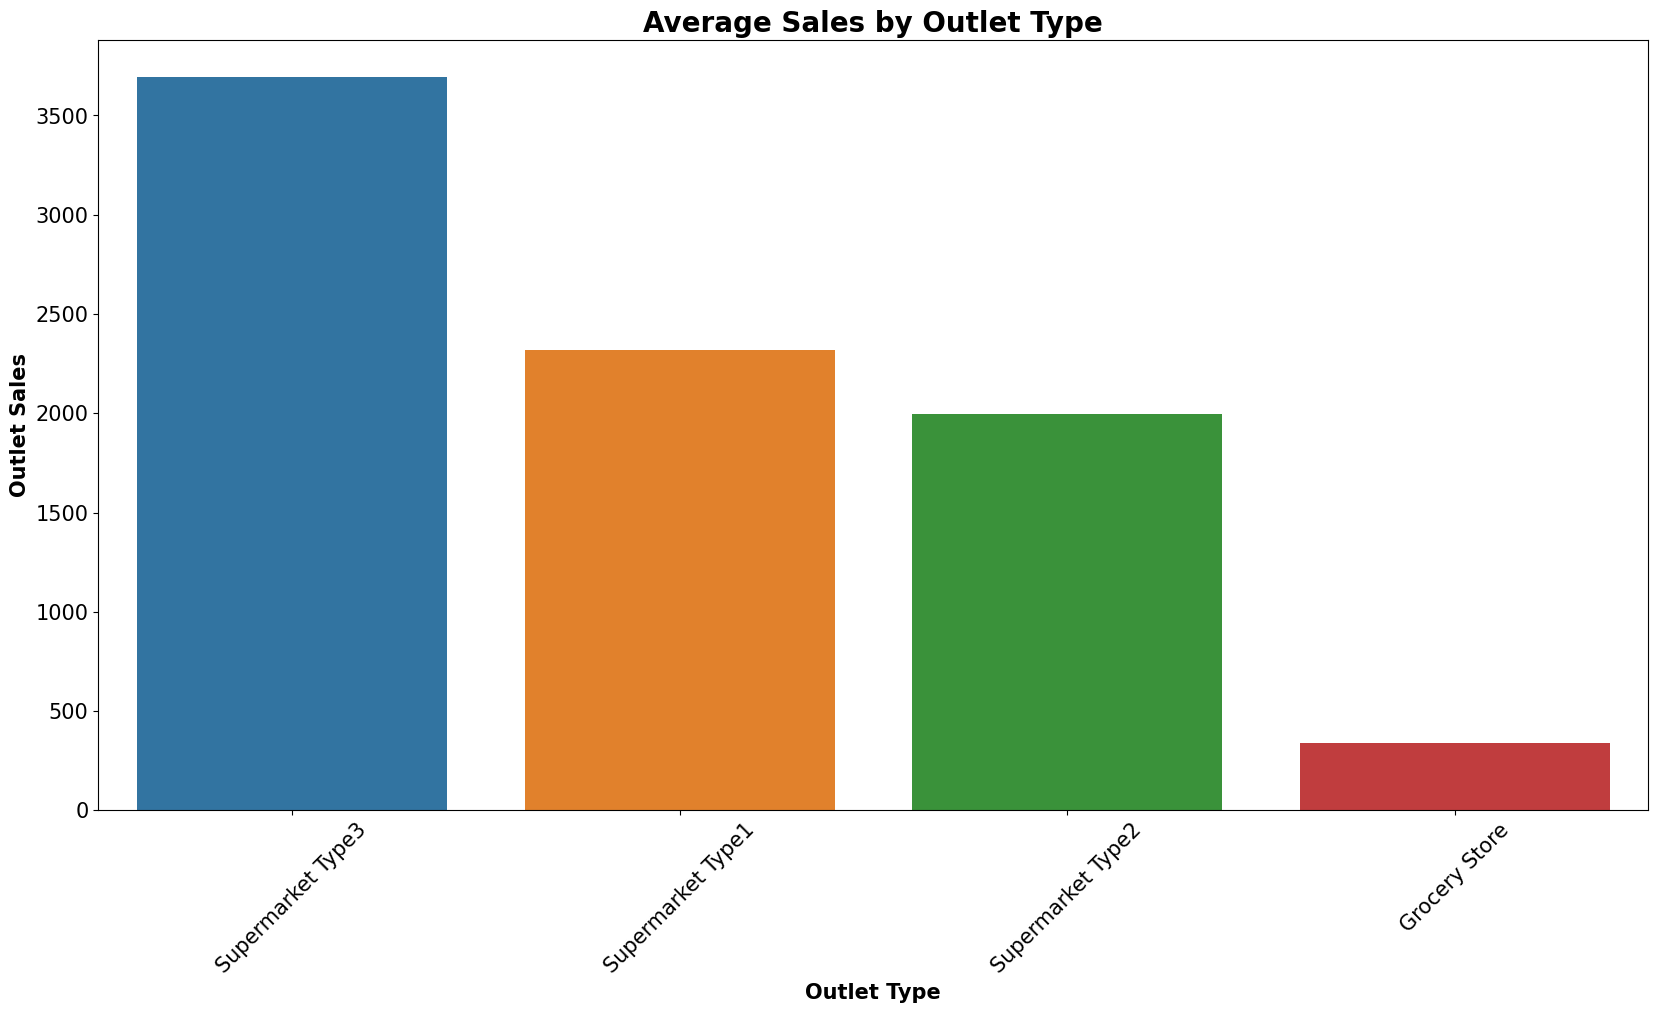

In [ ]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Outlet_Type', y ='Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Sales by Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 15, fontweight = 'bold');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);

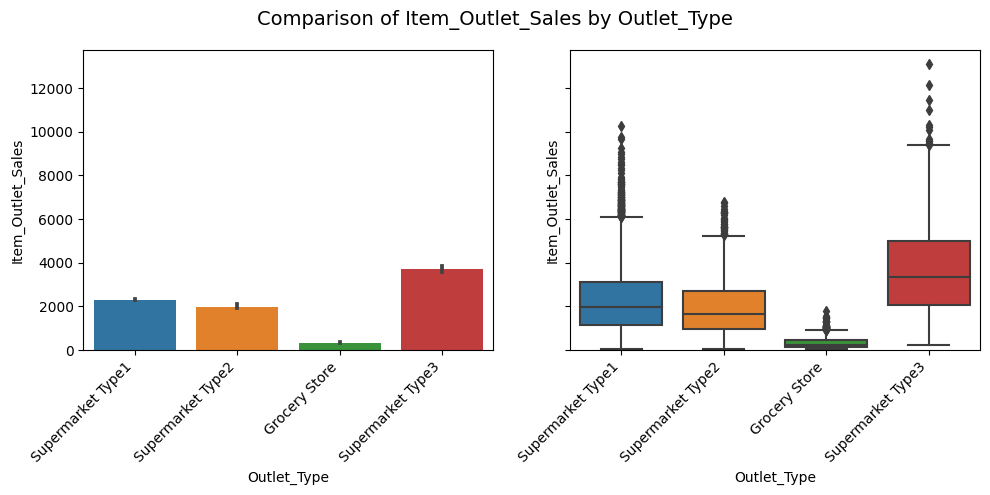

In [ ]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Box and bar plots
sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[0])
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1])

## Rotate xlabel in every subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

## Set super title
fig.suptitle('Comparison of Item_Outlet_Sales by Outlet_Type', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Supermarket 3 sells more items on average compared to the others.

Does the weight of an item affect its price?
Are some heavier items located within specific outlet types?

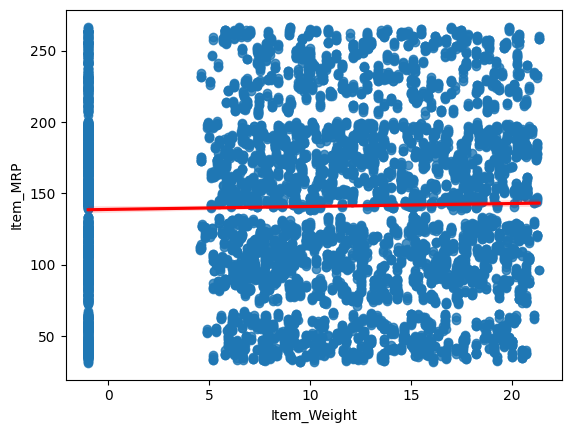

In [ ]:
ax = sns.regplot(data=df, y='Item_MRP', x='Item_Weight', line_kws={'color':'red'})

Item weight does not appear to affect the MRP at all.

Does the outlet type affect the number of Item_Outlet_Sales?

Does MRP have an effect on the number of sales?

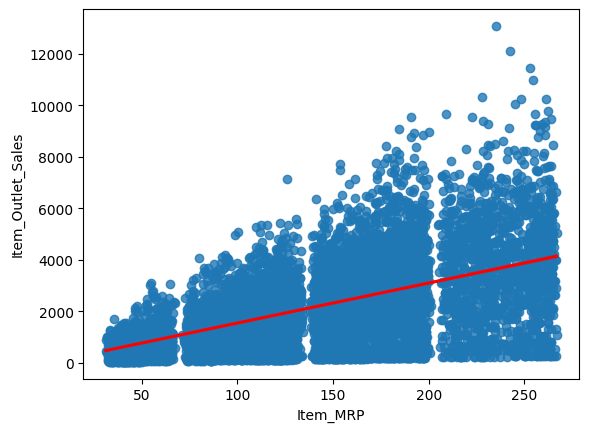

In [ ]:
ax = sns.regplot(data=df, y='Item_Outlet_Sales', x='Item_MRP', line_kws={'color':'red'})

There is a moderate positive correlation. In general, the higher the MRP, the higher the amount of sales.

This leads to a new question - what types of items are popular? Based off of the chart, it can be assumed that the items that sell more will have a higher MRP.

## **Issues and To-Do**


- Don't drop values for now, you should have SCIENTIFIC data to back up your reason for dropping things, not just a gut feeling from what you read.

---
To-Do

- Apply some styles to the graphs
- Function-ize plots
- Combine some graphs by super-imposing/layering them.
- Combine the average sales vs outlet type into a single code cell using multiple sub-plots

- Review data more in-depth
- Make other graphs to see if different explanations can be gleamed can be seen besides the ones offered by boxplots, heatmaps, and histograms.
  - ~~A regplot on the 0.57 correlating columns would be interesting.~~
- Consider splitting the identifiers (e.g. FD9418) into two columns, such as FD and then the number itself.
  - FD, OUT, etc. all go with their related item, Food/Drink, Outlet, Other, etc.


# Modeling

Update imports

In [3]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

## Reload original data

Reload the original data to redo the cleaning and ensure there will not be any data leakage.

In [4]:
# Load original data
original_url = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df2 = pd.read_csv(original_url)

In [5]:
# Verify that the data was properly loaded
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocessing Steps

In [6]:
# Check for duplicates
df2.duplicated().sum()

0

Fix inconsistencies

In [7]:
# Filter for categorical columns
cat_cols = df2.select_dtypes('object').columns

# Obtain the value counts for all string columns
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df2[col].value_counts())
  print("\n")


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


Inconsistent values found:

```
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
```

In [8]:
# Replace variations of "Low Fat" with "Low Fat"
df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat'}, inplace=True)

# Replace variations of "Regular" with "Regular"
df2['Item_Fat_Content'].replace({'reg': 'Regular'}, inplace=True)

In [9]:
# Confirm that fat variations have been fixed
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df2[col].value_counts())
  print("\n")

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Split

Since the target is 'Item_Outlet_Sales, we can drop the identifier column, as it will not have any impact on the predictions.

In [11]:
df2.drop(columns="Item_Identifier", inplace=True)

In [12]:
target = 'Item_Outlet_Sales'

# Separate features vs target & train/test split
X = df2.drop(columns = 'Item_Outlet_Sales')
y = df2[target]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [14]:
print("X_train\n---------")
X_train.info()
print("\n\nX_test\n---------")
X_test.info()

X_train
---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


X_test
---------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 10 columns):
 #   Co

## Column Transformer

### Numerical Pipeline



In [35]:
# Get list of numeric columns and instantiate a StandardScaler & imputer
num_cols = X_train.select_dtypes('number').columns
scaler = StandardScaler()
num_imputer = SimpleImputer(strategy='mean')

# Construct the tuple for column transformer with the scaler
num_tuple = ('numeric', make_pipeline(num_imputer, scaler), num_cols)
# num_tuple = ('numeric',scaler, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

### Nominal Pipeline

In [22]:
# Get list of categorical columns and instantiate a pipeline with imputer and encoder
cat_cols = X_train.select_dtypes('object').columns
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Construct the tuple for column transformer with the imputer and encoder pipeline
cat_tuple = ('categorical', make_pipeline(imputer_most_frequent, encoder_ohe), cat_cols)
cat_tuple


('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

None of the data within the columns imply a weighted order, where the order may be important.

As such, there is no need to make an ordinal pipeline.

### Build the Preprocessor

In [37]:
# Passing a list of tuples. Put the last parens on the same line as the last arg to follow PEP8 standards
# Remember, the order of the tuples matter! Transformations happen according to the order of the tuples
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(num_imputer, scaler), num_cols),
        ('categorical', make_pipeline(imputer_most_frequent, encoder_ohe), cat_cols)
    ],
    verbose_feature_names_out=False
)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [38]:
# Fit on training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### Transform the Data

In [39]:
# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.817249,-0.712775,1.828109,1.327849,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.556340,-1.291052,0.603369,1.327849,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.131512,1.813319,0.244541,0.136187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.169219,-1.004931,-0.952591,0.732018,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.528819,-0.965484,-0.336460,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# To-Do

Review and compare the code below from [Build Preprocessor](#scrollTo=B6N_pT1gdTVm) section.
```
# preprocessor = ColumnTransformer(
#     [
#         ('numeric', imputer, num_cols),
#         ('scaler', scaler, num_cols),
#         ('nominal', encoder_ohe, cat_cols),
#     ], verbose_feature_names_out=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', make_pipeline(num_imputer, scaler), num_cols),
        ('categorical', make_pipeline(imputer_most_frequent, encoder_ohe), cat_cols)
    ],
    verbose_feature_names_out=False
)

preprocessor
```
The first pre-processor was imputing nor scaling properly. After the transformation was applied, NaN's could still be seen, and as an additional result, extra columns were also created.